In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/saksh/Downloads/churn.csv")  
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [4]:
df.dropna(inplace=True)
df.drop('customerID', axis=1, inplace=True)


In [5]:

print("Shape after cleaning:", df.shape)

print("TotalCharges type:", df['TotalCharges'].dtype)

print("customerID in columns:", 'customerID' in df.columns)


Shape after cleaning: (7032, 20)
TotalCharges type: float64
customerID in columns: False


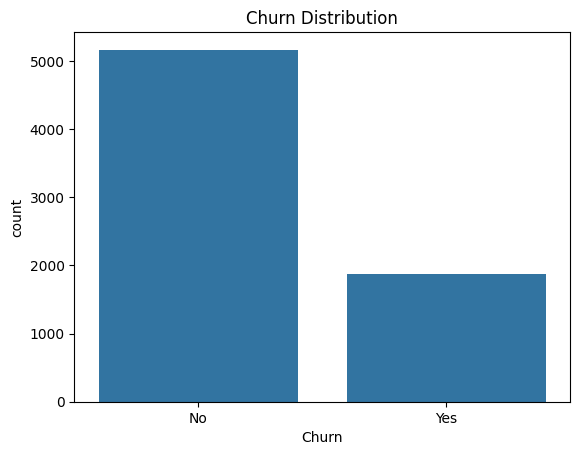

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()


print(df['Churn'].value_counts(normalize=True) * 100)



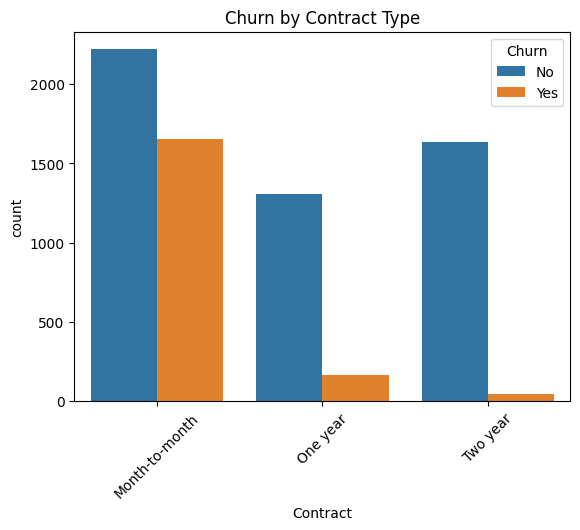

In [7]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")
plt.xticks(rotation=45)
plt.show()


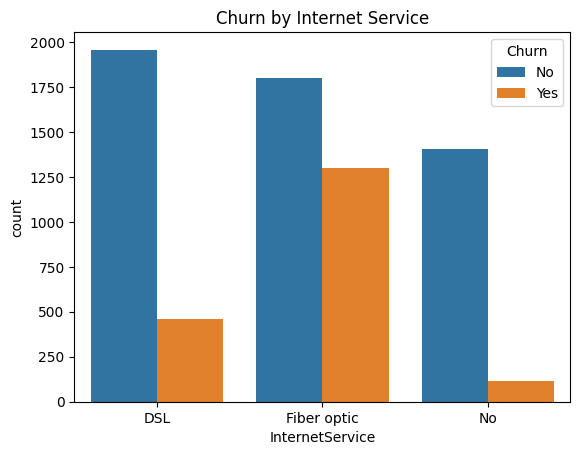

In [8]:
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("Churn by Internet Service")
plt.show()


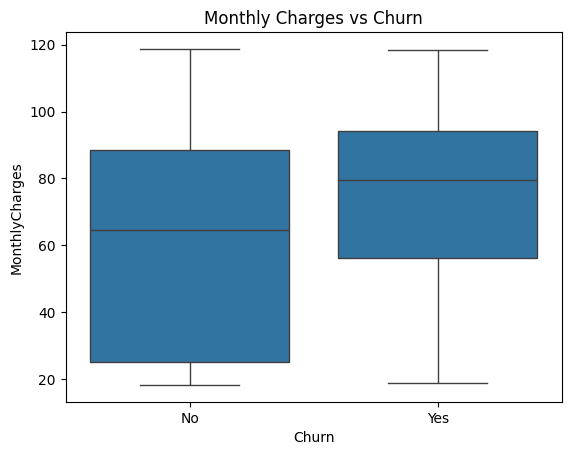

In [9]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges vs Churn")
plt.show()



In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [11]:
from sklearn.model_selection import train_test_split


In [12]:
import sklearn
print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.6.1


In [13]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
import pandas as pd

pd.DataFrame(X_train_scaled, columns=X.columns).head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439319,1.321816,0.981556,1.659900,0.996274,1.028312,1.529143,0.327542,-0.327542,1.165543,...,-0.522962,-0.797873,-0.522962,-0.799964,-0.515787,1.772603,-1.21303,1.905159,-0.716177,-0.539468
1,-0.439319,-0.267410,-0.971546,-0.562252,0.996274,-0.972468,-0.653961,-3.053048,3.053048,-0.857969,...,-0.522962,-0.797873,-0.522962,-0.799964,-0.515787,-0.564142,-1.21303,-0.524891,1.396302,-0.539468
2,-0.439319,1.444064,0.837066,1.756104,-1.003740,1.028312,-0.653961,0.327542,-0.327542,1.165543,...,-0.522962,-0.797873,-0.522962,-0.799964,-0.515787,1.772603,-1.21303,1.905159,-0.716177,-0.539468
3,-0.439319,-1.204646,0.641092,-0.908326,0.996274,-0.972468,-0.653961,0.327542,-0.327542,-0.857969,...,-0.522962,-0.797873,-0.522962,1.250057,-0.515787,-0.564142,-1.21303,-0.524891,1.396302,-0.539468
4,-0.439319,0.669826,-0.808787,-0.101561,-1.003740,1.028312,-0.653961,-3.053048,3.053048,-0.857969,...,-0.522962,1.253332,-0.522962,-0.799964,-0.515787,-0.564142,-1.21303,-0.524891,-0.716177,-0.539468


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1033
        True       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Confusion Matrix:
[[916 117]
 [159 215]]


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
[[917 116]
 [182 192]]


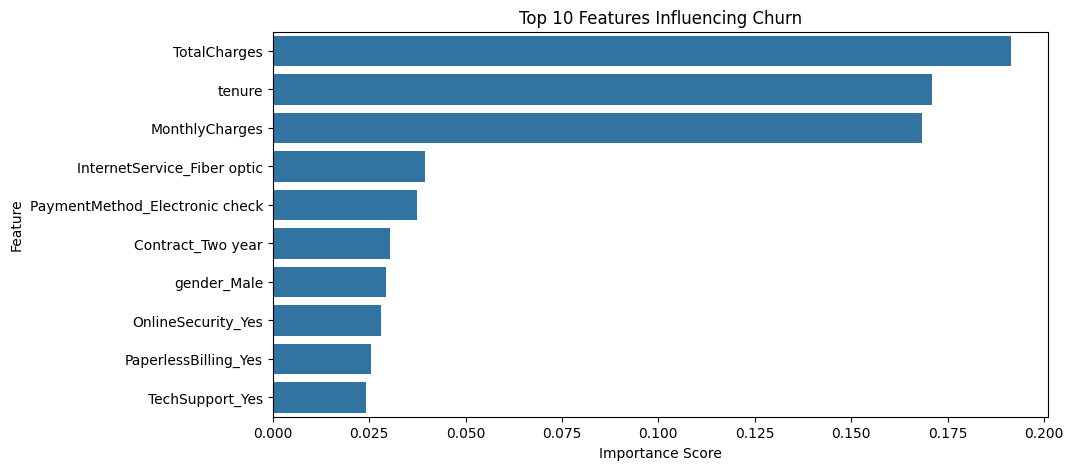

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)[:10]  # Top 10

# Plot them
plt.figure(figsize=(10,5))
sns.barplot(x=importances_sorted.values, y=importances_sorted.index)
plt.title("Top 10 Features Influencing Churn")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


## ✅ Project Summary: Customer Churn Prediction

This project predicts whether a telecom customer is likely to churn using machine learning.

### 📊 Key Steps:
- Data cleaning, EDA, and encoding
- Feature scaling
- Built Logistic Regression and Random Forest models
- Evaluated using accuracy, precision, recall, and F1-score
- Visualized top 10 features contributing to churn

### 🎯 Best Model:
- **Random Forest**
- Improved churn prediction compared to baseline
- Top churn indicators: Contract type, Monthly charges, Internet service

### 🧠 Skills Used:
- Python (Pandas, NumPy, Seaborn, Matplotlib, Scikit-learn)
- Data Cleaning
- Exploratory Data Analysis
- Machine Learning Modeling
- Model Evaluation and Visualization
